In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [2]:
import os
load_dotenv()

True

In [4]:
def groq_llm():
    return ChatOpenAI(
        model="openai/gpt-oss-20b",
        base_url="https://api.groq.com/openai/v1",
        api_key=os.getenv("GROQ_API_KEY"),
        temperature=0.7, max_tokens=2000
    )

llm = groq_llm()

In [5]:
class JokeState(TypedDict):
    topic: str
    joke: str
    explanation: str

In [6]:
def generate_joke(state: JokeState):
    prompt = f"generate a joke on the topic {state["topic"]}"
    response = llm.invoke(prompt).content

    return {'joke': response}

In [7]:
def generate_explanation(state: JokeState):
    prompt = f"Write an explanation for the joke - {state['joke']}"
    response = llm.invoke(prompt).content

    return {'explanation': response}

In [8]:
graph = StateGraph(JokeState)

graph.add_node("joke", generate_joke)
graph.add_node("explanation", generate_explanation)

graph.add_edge(START, "joke")
graph.add_edge("joke", "explanation")
graph.add_edge("explanation", END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

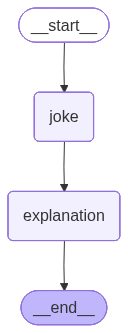

In [10]:
workflow

In [11]:
config1 = {"configurable": {"thread_id": 1}}
workflow.invoke({'topic': "pizza"}, config=config1)

{'topic': 'pizza',
 'joke': 'Why did the pizza go to therapy?  \n\nBecause it felt it was always being *topped* and never *cheddared*!',
 'explanation': '**Why did the pizza go to therapy?  \nBecause it felt it was always being *topped* and never *cheddared*!**\n\n---\n\n### The wordplay that makes it funny\n\n| Word | Literal meaning on a pizza | Punny, figurative meaning |\n|------|----------------------------|---------------------------|\n| **topped** | Covered with sauce, vegetables, pepperoni, etc. | “Being topped” as in “getting a lot of attention” or “always on top of things.” |\n| **cheddared** | (Invented) “Covered with cheddar cheese.” | A play on the word *cheddar* (the cheese) and the verb *to cheddar* (to be covered in it). It sounds like *cheated* or *cheddar‑ed*, but it’s a made‑up verb that only makes sense on a pizza. |\n\nSo the joke is a pun that anthropomorphizes the pizza:\n\n* The pizza feels **“always being topped”**—it’s constantly getting sauce, veggies, meats,

In [12]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to therapy?  \n\nBecause it felt it was always being *topped* and never *cheddared*!', 'explanation': '**Why did the pizza go to therapy?  \nBecause it felt it was always being *topped* and never *cheddared*!**\n\n---\n\n### The wordplay that makes it funny\n\n| Word | Literal meaning on a pizza | Punny, figurative meaning |\n|------|----------------------------|---------------------------|\n| **topped** | Covered with sauce, vegetables, pepperoni, etc. | “Being topped” as in “getting a lot of attention” or “always on top of things.” |\n| **cheddared** | (Invented) “Covered with cheddar cheese.” | A play on the word *cheddar* (the cheese) and the verb *to cheddar* (to be covered in it). It sounds like *cheated* or *cheddar‑ed*, but it’s a made‑up verb that only makes sense on a pizza. |\n\nSo the joke is a pun that anthropomorphizes the pizza:\n\n* The pizza feels **“always being topped”**—it’s constantly getting sau

### Intermediate States

In [13]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to therapy?  \n\nBecause it felt it was always being *topped* and never *cheddared*!', 'explanation': '**Why did the pizza go to therapy?  \nBecause it felt it was always being *topped* and never *cheddared*!**\n\n---\n\n### The wordplay that makes it funny\n\n| Word | Literal meaning on a pizza | Punny, figurative meaning |\n|------|----------------------------|---------------------------|\n| **topped** | Covered with sauce, vegetables, pepperoni, etc. | “Being topped” as in “getting a lot of attention” or “always on top of things.” |\n| **cheddared** | (Invented) “Covered with cheddar cheese.” | A play on the word *cheddar* (the cheese) and the verb *to cheddar* (to be covered in it). It sounds like *cheated* or *cheddar‑ed*, but it’s a made‑up verb that only makes sense on a pizza. |\n\nSo the joke is a pun that anthropomorphizes the pizza:\n\n* The pizza feels **“always being topped”**—it’s constantly getting sa

In [14]:
config2 = {"configurable": {"thread_id": 2}}
workflow.invoke({'topic': "pasta"}, config=config2)

{'topic': 'pasta',
 'joke': 'Why did the chef refuse to tell a joke about pasta?\n\nBecause he heard it would be *noodle*‑worthy of the audience!',
 'explanation': '**Why the joke works – a quick “noodle‑worthy” pun explained**\n\n1. **The set‑up**  \n   *“Why did the chef refuse to tell a joke about pasta?”*  \n   The listener expects a culinary‑themed punchline, which primes the brain for a play on words involving food.\n\n2. **The payoff**  \n   *“Because he heard it would be *noodle*-worthy of the audience!”*  \n   The humor comes from the made‑up word **“noodle‑worthy.”**  \n\n3. **Breaking it down**  \n   - **“Noodle”**: a common slang for pasta (the subject of the joke).  \n   - **“Worthy”**: a word that means “deserving” or “good enough.”  \n   - The phrase *“not worthy”* (meaning “not good enough”) sounds like **“noodle‑worthy”** when spoken.  \n\n4. **The pun**  \n   The chef thinks the joke will be *not worthy* of the audience, but the joke replaces “not” with “noodle” to ke

In [15]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the chef refuse to tell a joke about pasta?\n\nBecause he heard it would be *noodle*‑worthy of the audience!', 'explanation': '**Why the joke works – a quick “noodle‑worthy” pun explained**\n\n1. **The set‑up**  \n   *“Why did the chef refuse to tell a joke about pasta?”*  \n   The listener expects a culinary‑themed punchline, which primes the brain for a play on words involving food.\n\n2. **The payoff**  \n   *“Because he heard it would be *noodle*-worthy of the audience!”*  \n   The humor comes from the made‑up word **“noodle‑worthy.”**  \n\n3. **Breaking it down**  \n   - **“Noodle”**: a common slang for pasta (the subject of the joke).  \n   - **“Worthy”**: a word that means “deserving” or “good enough.”  \n   - The phrase *“not worthy”* (meaning “not good enough”) sounds like **“noodle‑worthy”** when spoken.  \n\n4. **The pun**  \n   The chef thinks the joke will be *not worthy* of the audience, but the joke replaces “not” 

# Time Travel

## We can go back to any previous node to do the execution again for debugging & changing the input as well

### Example - 
coming back to the pizza example, where we got the topic & we want to go back to joke generation step & further steps.
In order to do that we need to grab the checkpoint id where we got the topic. We can get it from the state history

In [16]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the chef refuse to tell a joke about pasta?\n\nBecause he heard it would be *noodle*‑worthy of the audience!', 'explanation': '**Why the joke works – a quick “noodle‑worthy” pun explained**\n\n1. **The set‑up**  \n   *“Why did the chef refuse to tell a joke about pasta?”*  \n   The listener expects a culinary‑themed punchline, which primes the brain for a play on words involving food.\n\n2. **The payoff**  \n   *“Because he heard it would be *noodle*-worthy of the audience!”*  \n   The humor comes from the made‑up word **“noodle‑worthy.”**  \n\n3. **Breaking it down**  \n   - **“Noodle”**: a common slang for pasta (the subject of the joke).  \n   - **“Worthy”**: a word that means “deserving” or “good enough.”  \n   - The phrase *“not worthy”* (meaning “not good enough”) sounds like **“noodle‑worthy”** when spoken.  \n\n4. **The pun**  \n   The chef thinks the joke will be *not worthy* of the audience, but the joke replaces “not”

In [18]:
workflow.get_state({"configurable": {"thread_id": 1, "checkpointId": "1f0f0a85-3366-6f76-8000-8ed28db95298"}})

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to therapy?  \n\nBecause it felt it was always being *topped* and never *cheddared*!', 'explanation': '**Why did the pizza go to therapy?  \nBecause it felt it was always being *topped* and never *cheddared*!**\n\n---\n\n### The wordplay that makes it funny\n\n| Word | Literal meaning on a pizza | Punny, figurative meaning |\n|------|----------------------------|---------------------------|\n| **topped** | Covered with sauce, vegetables, pepperoni, etc. | “Being topped” as in “getting a lot of attention” or “always on top of things.” |\n| **cheddared** | (Invented) “Covered with cheddar cheese.” | A play on the word *cheddar* (the cheese) and the verb *to cheddar* (to be covered in it). It sounds like *cheated* or *cheddar‑ed*, but it’s a made‑up verb that only makes sense on a pizza. |\n\nSo the joke is a pun that anthropomorphizes the pizza:\n\n* The pizza feels **“always being topped”**—it’s constantly getting sau

In [19]:
workflow.invoke(None, {"configurable": {"thread_id": 1, "checkpoint_id": "1f0f0a85-3366-6f76-8000-8ed28db95298"}})

{'topic': 'pizza',
 'joke': 'Why did the pizza go to therapy?  \nBecause it felt *cheddared* out of its toppings and wanted to *crust* a new life!',
 'explanation': '**Explanation of the joke**\n\n> *“Why did the pizza go to therapy?  \n>  Because it felt *cheddared* out of its toppings and wanted to *crust* a new life!”*\n\nThe humor comes from a few layers of word‑play and anthropomorphism:\n\n1. **Anthropomorphism** – The pizza is given human emotions (“felt cheddared out”) and a need for therapy, which is absurd and funny in itself.\n\n2. **Play on the word “cheddar”** –  \n   *Cheddared* sounds like “cheated” (as in being wronged or left out).  \n   In pizza terms, “cheddar” is a type of cheese, so the joke mixes the literal cheese (“cheddar”) with the figurative sense of being “cheated out” of toppings.\n\n3. **Play on the word “crust”** –  \n   The phrase “wanted to *crust* a new life” sounds like “crust” (the hard outer edge of a pizza) used as a verb, which is nonsense in norm

### We can see more snapshot due to the re-execution

In [20]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to therapy?  \nBecause it felt *cheddared* out of its toppings and wanted to *crust* a new life!', 'explanation': '**Explanation of the joke**\n\n> *“Why did the pizza go to therapy?  \n>  Because it felt *cheddared* out of its toppings and wanted to *crust* a new life!”*\n\nThe humor comes from a few layers of word‑play and anthropomorphism:\n\n1. **Anthropomorphism** – The pizza is given human emotions (“felt cheddared out”) and a need for therapy, which is absurd and funny in itself.\n\n2. **Play on the word “cheddar”** –  \n   *Cheddared* sounds like “cheated” (as in being wronged or left out).  \n   In pizza terms, “cheddar” is a type of cheese, so the joke mixes the literal cheese (“cheddar”) with the figurative sense of being “cheated out” of toppings.\n\n3. **Play on the word “crust”** –  \n   The phrase “wanted to *crust* a new life” sounds like “crust” (the hard outer edge of a pizza) used as a verb, which

### Updating the State

In [21]:
workflow.update_state({"configurable": {"thread_id": 1, "checkpoint_id": "1f0f0a85-3366-6f76-8000-8ed28db95298", "checkpoint_ns": ""}}, {"topic": "Burger"})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0f0aaf-37b2-6a56-8001-9a02a2fc13ec'}}

### 👆Earlier the topic at the checkpoint id - "1f0f0a85-3366-6f76-8000-8ed28db95298" was Pizza but using the above `update_state` method, we updated it to Burger, on the same checkpoint id

In [22]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'Burger'}, next=('joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f0aaf-37b2-6a56-8001-9a02a2fc13ec'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2026-01-13T18:09:06.852708+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f0a85-3366-6f76-8000-8ed28db95298'}}, tasks=(PregelTask(id='3f95bd76-f19e-8c88-8aed-dd460d6f8ef8', name='joke', path=('__pregel_pull', 'joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to therapy?  \nBecause it felt *cheddared* out of its toppings and wanted to *crust* a new life!', 'explanation': '**Explanation of the joke**\n\n> *“Why did the pizza go to therapy?  \n>  Because it felt *cheddared* out of its toppings and wanted to *crust* a new life!”*\n\nThe humor comes from a few layers of word‑play and anthropom

In [25]:
workflow.invoke(None, {"configurable": {"thread_id": 1, "checkpoint_id": "1f0f0aaf-37b2-6a56-8001-9a02a2fc13ec"}})

{'topic': 'Burger',
 'joke': 'Why did the burger apply for a job?\n\nBecause it wanted to become a *well-done* professional!',
 'explanation': '**Explanation**\n\nThe joke hinges on a double meaning of the phrase **“well‑done.”**  \n\n1. **Literal meaning (cooking)** – When you cook a burger, you can choose how “done” it is: rare, medium, or **well‑done** (fully cooked through).  \n2. **Figurative meaning (skill/experience)** – In everyday speech, someone who is “well‑done” in a field is a seasoned, experienced professional—someone who has “done” a lot and is now a **professional** in that area.\n\nSo the punchline plays on these two senses:\n\n- A burger, being a food item, would naturally care about how it’s cooked.  \n- The joke anthropomorphizes the burger and gives it a career ambition: it wants to “become a *well‑done* professional.”  \n  - **“Professional”** here is a noun (someone who works in a profession).  \n  - The adjective **“well‑done”** modifies it, meaning the burger w

In [26]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'Burger', 'joke': 'Why did the burger apply for a job?\n\nBecause it wanted to become a *well-done* professional!', 'explanation': '**Explanation**\n\nThe joke hinges on a double meaning of the phrase **“well‑done.”**  \n\n1. **Literal meaning (cooking)** – When you cook a burger, you can choose how “done” it is: rare, medium, or **well‑done** (fully cooked through).  \n2. **Figurative meaning (skill/experience)** – In everyday speech, someone who is “well‑done” in a field is a seasoned, experienced professional—someone who has “done” a lot and is now a **professional** in that area.\n\nSo the punchline plays on these two senses:\n\n- A burger, being a food item, would naturally care about how it’s cooked.  \n- The joke anthropomorphizes the burger and gives it a career ambition: it wants to “become a *well‑done* professional.”  \n  - **“Professional”** here is a noun (someone who works in a profession).  \n  - The adjective **“well‑done”** modifies it, 

### Fault Tolerance is kind of similar to Human In The Loop (HITL) 
*Note:-* In HITL we do it purposefully using langgraph interrupt

### Fault Tolerance

In [27]:
from langgraph.graph import START, END, StateGraph
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [ ]:
# 1. Define the state
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str
    step3: str